In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
import matplotlib
import matplotlib.pyplot as plt
#from mpld3 import enable_notebook # this is a very nice widget for matplotlib
#from mpld3 import plugins
#enable_notebook()

%matplotlib inline 

In [2]:
#df = pd.read_csv('/Users/arnaud/cellule/data/bnpp/ETSAnonymousPricesFull.csv', parse_dates=['TradeDateTime'], index_col='TradeDateTime')
df = pd.read_csv('/Users/lecueguillaume/Documents/bnpp/bnpp_donnees/ETSAnonymousPricesFull_2.csv', parse_dates=['TradeDateTime'], index_col='TradeDateTime')

/usr/local/lib/python2.7/site-packages/pandas/io/parsers.py:1154: DtypeWarning: Columns (9,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
print 'There are {} rows and {} columns'.format(df.shape[0], df.shape[1])

There are 1057361 rows and 57 columns


In [6]:
#df[:3]
#print list(df[:1])
#df.values[0]

# Keep only users who bought bounds ('BuySell' = 'Buy')

In [7]:
indices_buy = df['BuySell'] == "Buy"
df2 = df[indices_buy][['Customer', 'Ticker',  'NotionalEUR', 'Sector','TradeStatus']] #'RFQOrderType'
print 'There are {} rows with BuySell = Sell'.format(df2.shape[0])
print 'There are {} tickers and {} clients'.format(len(df2['Ticker'].unique()), len(df2['Customer'].unique()))

There are 39985 rows with BuySell = Sell
There are 957 tickers and 930 clients


In [8]:
df2.head(5)

,Customer,Ticker,NotionalEUR,Sector,TradeStatus
TradeDateTime,,,,,
2014-10-02 06:09:33,36,NDB,50000.000000,Bank,Done
2014-02-03 07:28:22,203,REPSM,1500000.000000,Oil Coal Gas,Passed
2014-10-02 06:16:05,2,BACR,789016.884961,Bank,Done
2014-10-02 06:20:13,2,ACAFP,789016.884961,Bank,TradedAway
2014-02-03 07:33:04,203,EVKGR,1000000.000000,Chemicals/Healthcare,NotTraded


In [9]:
df2.Sector.unique()

array(['Bank', 'Oil Coal Gas', 'Chemicals/Healthcare', 'Special Purpose',
       'Financial Corporate', 'Insurance', 'Building/Mat/Construc',
       'Electricity/Gas', 'Airline/Transport', 'Telecom', 'Food/Beverages',
       'Government', 'Other', 'Metals', 'Sovereign', 'Water',
       'Agriculture', 'Auto/Components', 'Railways', 'Power/Ind Equipment',
       'Manufacturers & Services', 'Tobacco', 'Regional', 'Supra-National',
       'Clothing/Luxury', 'Distrib/Retail', 'Media & Cable', 'Gaming',
       'Computers & IT', 'Elect/House Appliances', 'Aero/Defense',
       'Paper/Packaging', 'Property', 'Financial', 'Corporate',
       'Hotel/Catering', 'Public', 'Covered', nan], dtype=object)

# Tickers orientated statistics

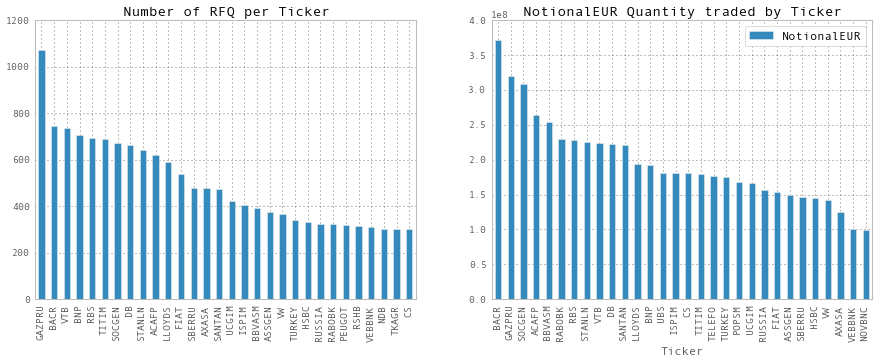

In [10]:
best_tickers = df2['Ticker'].value_counts()[0:30]
best_tickers_notional = df2[['NotionalEUR', 'Ticker']].groupby('Ticker').aggregate(sum)
best_tickers_notional_sort = best_tickers_notional.sort('NotionalEUR', ascending = False)[0:30]
fig, axs = plt.subplots(1,2)
figure_size = (15,5)
best_tickers.plot(ax = axs[0], kind='bar', title = 'Number of RFQ per Ticker', figsize = figure_size)
best_tickers_notional_sort.plot(ax = axs[1], kind = 'bar', title = 'NotionalEUR Quantity traded by Ticker', figsize = figure_size)

In [11]:
print 'The total sum of bounds sold is {} EUR'.format(df2['NotionalEUR'].sum())

The total sum of bounds sold is 15401046447.5 EUR


There are 54 Tickers (over 957) representing 50.19 per cent of the total number of bounds bought
There are 500 Tickers (over 957) representing 5.85 per cent of the total number of bounds bought


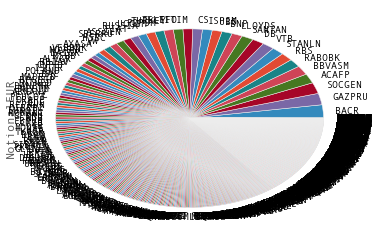

In [12]:
tab = df2[['NotionalEUR', 'Ticker']].groupby('Ticker').aggregate(sum).sort('NotionalEUR', ascending = False)
tab.plot(kind='pie', subplots=True, legend=False)
best_tickers_notional = df2[['Ticker', 'NotionalEUR']].groupby('Ticker').aggregate(sum)
best_tickers_notional_sort = best_tickers_notional.sort('NotionalEUR', ascending = False)
nb_tickers_total = len(df2['Ticker'].unique())
nb_tickers = 54
pourcentage =  100*best_tickers_notional_sort[0:nb_tickers].sum()[0]/df2['NotionalEUR'].sum()
print 'There are {0} Tickers (over {2}) representing {1:.2f} per cent of the total number of bounds bought'.format(nb_tickers, pourcentage, nb_tickers_total)
nb_tickers_fin = 500
best_tickers_notional_sort_2 = best_tickers_notional.sort('NotionalEUR')
pourcentage_fin =  100*best_tickers_notional_sort_2[0:nb_tickers_fin].sum()[0]/df2['NotionalEUR'].sum()
print 'There are {0} Tickers (over {2}) representing {1:.2f} per cent of the total number of bounds bought'.format(nb_tickers_fin, pourcentage_fin, nb_tickers_total)

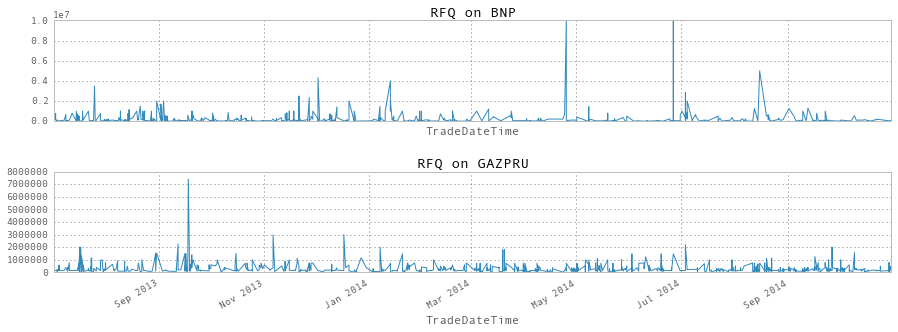

In [14]:
ticker_name_1 = "BNP" # "BACR" #"GAZPRU" # "BACR"
ticker_name_2 = "GAZPRU" #"BNP" # "BACR" # # "BACR"
indices_ticker_1 = df2['Ticker'] == ticker_name_1
indices_ticker_2 = df2['Ticker'] == ticker_name_2
df_ticker_1 = df2[indices_ticker_1]
df_ticker_2 = df2[indices_ticker_2]
fig, axs = plt.subplots(2,1, sharex = True)
df_ticker_1['NotionalEUR'].plot(ax = axs[0], figsize=(15,5), title = 'RFQ on {}'.format(ticker_name_1))
df_ticker_2['NotionalEUR'].plot(ax = axs[1], figsize=(15,5), title = 'RFQ on {}'.format(ticker_name_2))

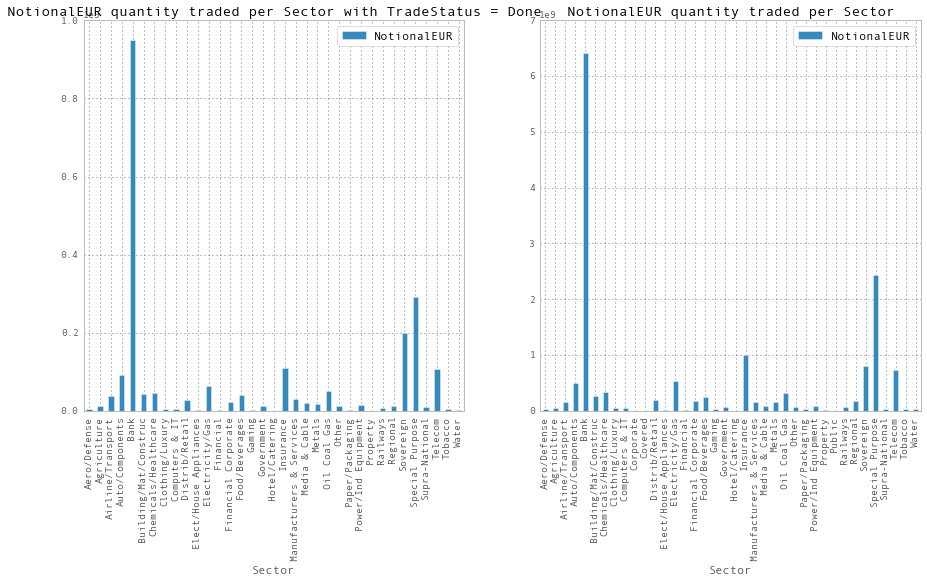

In [15]:
indices = df2['TradeStatus'] == "Done"
fig, axs = plt.subplots(1,2)
axs[0].set_title('NotionalEUR quantity traded per Sector with TradeStatus = Done')
axs[1].set_title('NotionalEUR quantity traded per Sector')
df2[indices][['NotionalEUR', 'Sector']].groupby('Sector').aggregate(sum).plot(ax = axs[0], kind='bar', figsize=(15,7))
df2[['NotionalEUR', 'Sector']].groupby('Sector').aggregate(sum).plot(ax = axs[1], kind='bar', figsize=(15,7))

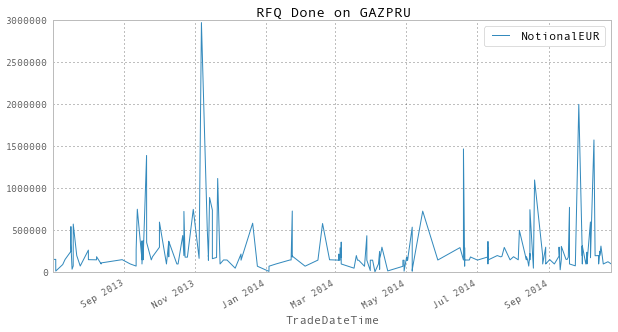

In [16]:
indices1 = df2['TradeStatus'] == "Done"
indices2 = df2['Ticker'].isin(["GAZPRU"])
df2[indices1 & indices2][['NotionalEUR']].plot(figsize = [10,5], title = 'RFQ Done on GAZPRU')

# Users orientated statistics

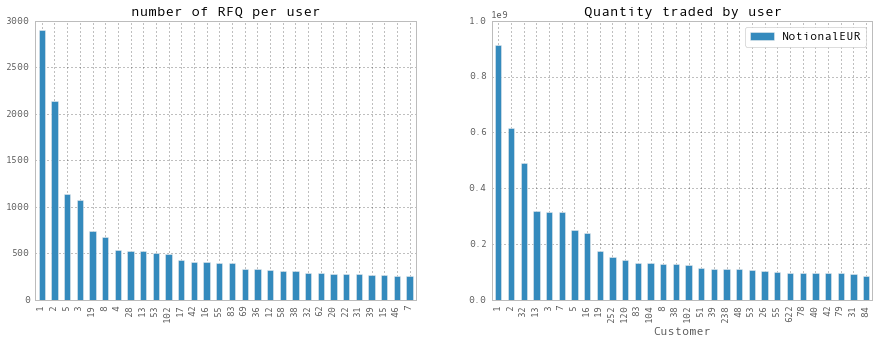

In [17]:
best_customers = df2['Customer'].value_counts()[0:30]
best_customers_notional = df2[['Customer', 'NotionalEUR']].groupby('Customer').aggregate(sum)
best_customers_notional_sort = best_customers_notional.sort('NotionalEUR', ascending = False)[0:30]
fig, axs = plt.subplots(1,2)
fig_size = (15,5)
best_customers.plot(ax = axs[0], kind='bar', title = 'number of RFQ per user', figsize = fig_size)
best_customers_notional_sort.plot(ax = axs[1], kind = 'bar', title = 'Quantity traded by user', figsize = fig_size)

There are 55 customers (over 930) who bought 50.23 per cent of the total number of bounds
There are 500 customers (over 930) who bought 5.85 per cent of the total number of bounds


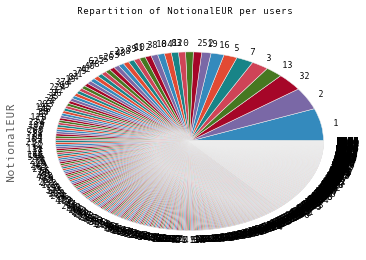

In [18]:
tab = df2[['NotionalEUR', 'Customer']].groupby('Customer').aggregate(sum).sort('NotionalEUR', ascending = False)
tab.plot(kind='pie', subplots=True, legend=False, title = 'Repartition of NotionalEUR per users')
best_customers_notional = df2[['Customer', 'NotionalEUR']].groupby('Customer').aggregate(sum)
best_customers_notional_sort = best_customers_notional.sort('NotionalEUR', ascending = False)
nb_cust_total = len(df2['Customer'].unique())
nb_cust = 55
pourcentage =  100*best_customers_notional_sort[0:nb_cust].sum()[0]/df2['NotionalEUR'].sum()
print 'There are {0} customers (over {2}) who bought {1:.2f} per cent of the total number of bounds'.format(nb_cust, pourcentage, nb_cust_total)
nb_cust_fin = 500
best_customers_notional_sort_2 = best_customers_notional.sort('NotionalEUR')
pourcentage_fin =  100*best_customers_notional_sort_2[0:nb_cust_fin].sum()[0]/df2['NotionalEUR'].sum()
print 'There are {0} customers (over {2}) who bought {1:.2f} per cent of the total number of bounds'.format(nb_cust_fin, pourcentage_fin, nb_cust_total)

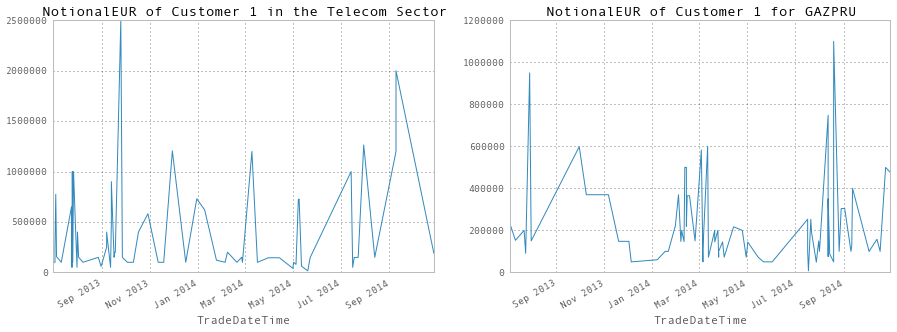

In [19]:
ind_custom = df2['Customer'] == 1
ind_ticker = df2['Ticker'].isin(["GAZPRU"])
ind_sector = df2['Sector'] == 'Telecom' 
fig, axs = plt.subplots(1,2)
fig_size = (15,5)
df2[ind_custom & ind_sector]['NotionalEUR'].plot(ax = axs[0], figsize = fig_size, title = 'NotionalEUR of Customer 1 in the Telecom Sector')
df2[ind_custom & ind_ticker]['NotionalEUR'].plot(ax = axs[1], figsize = fig_size, title = 'NotionalEUR of Customer 1 for GAZPRU')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ac9fad0>], dtype=object)

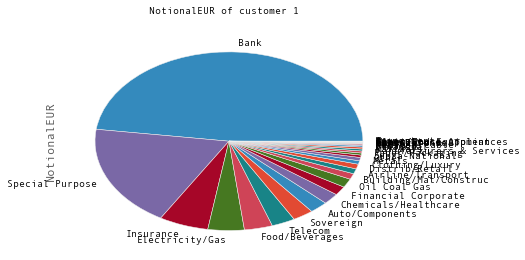

In [20]:
id_cust = 1
ind_custom = df2['Customer'] == id_cust
tab = df2[ind_custom][['NotionalEUR', 'Sector']].groupby('Sector').aggregate(sum).sort('NotionalEUR', ascending = False)
tab.plot(kind='pie', subplots=True, legend=False, title = 'NotionalEUR of customer {}'.format(id_cust))

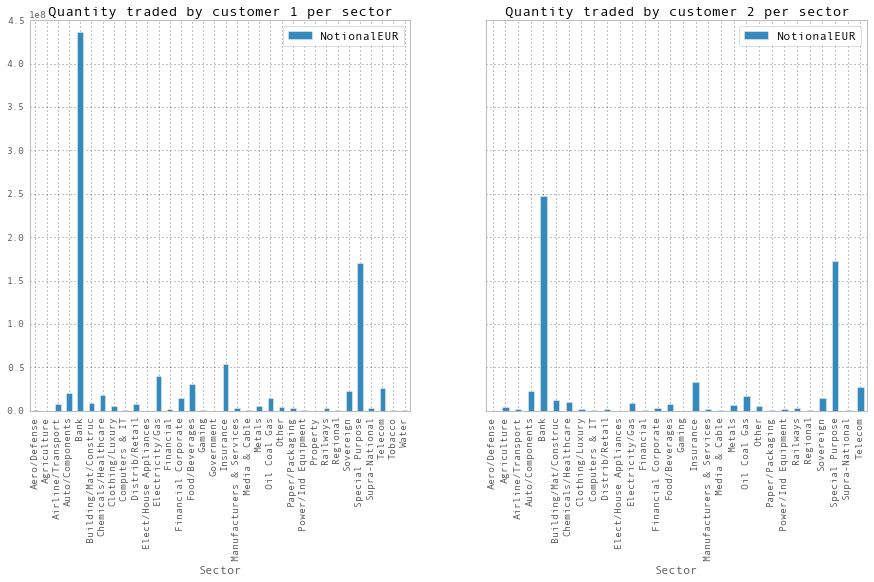

In [21]:
nb_cust_1, nb_cust_2 = 1, 2
ind_custom_1, ind_custom_2 = df2['Customer'] == nb_cust_1, df2['Customer'] == nb_cust_2
fig, axs = plt.subplots(1,2, sharey='row')
title_1 = 'Quantity traded by customer {} per sector'.format(nb_cust_1)
title_2 = 'Quantity traded by customer {} per sector'.format(nb_cust_2)
axs[0].set_title(title_1)
axs[1].set_title(title_2)
fig_size = (15,7)
df2[ind_custom_1][['NotionalEUR', 'Sector']].groupby('Sector').aggregate(sum).plot(ax = axs[0],  kind='bar', figsize=fig_size)#, title = title_1)
df2[ind_custom_2][['NotionalEUR', 'Sector']].groupby('Sector').aggregate(sum).plot(ax = axs[1],  kind='bar', figsize=fig_size)#, title = title_2)

# Sector orientated statistics

In [22]:
df2['Sector'].unique()

array(['Bank', 'Oil Coal Gas', 'Chemicals/Healthcare', 'Special Purpose',
       'Financial Corporate', 'Insurance', 'Building/Mat/Construc',
       'Electricity/Gas', 'Airline/Transport', 'Telecom', 'Food/Beverages',
       'Government', 'Other', 'Metals', 'Sovereign', 'Water',
       'Agriculture', 'Auto/Components', 'Railways', 'Power/Ind Equipment',
       'Manufacturers & Services', 'Tobacco', 'Regional', 'Supra-National',
       'Clothing/Luxury', 'Distrib/Retail', 'Media & Cable', 'Gaming',
       'Computers & IT', 'Elect/House Appliances', 'Aero/Defense',
       'Paper/Packaging', 'Property', 'Financial', 'Corporate',
       'Hotel/Catering', 'Public', 'Covered', nan], dtype=object)

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:2544: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735354.430694, right=735354.430694
  'left=%s, right=%s') % (left, right))


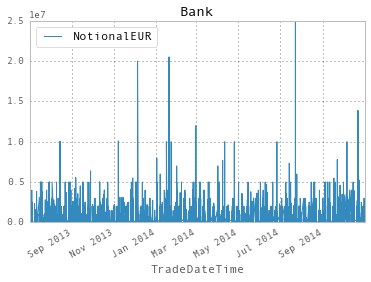

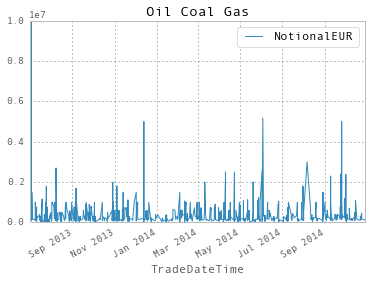

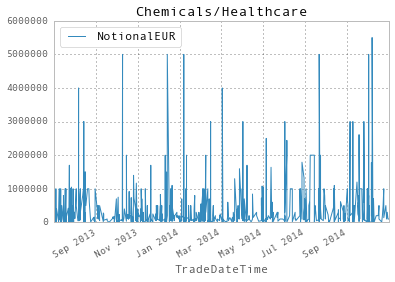

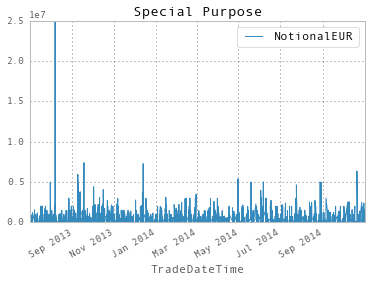

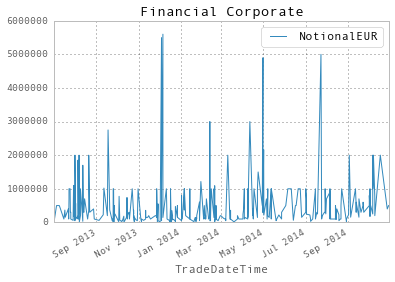

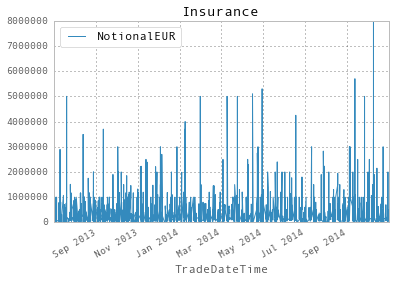

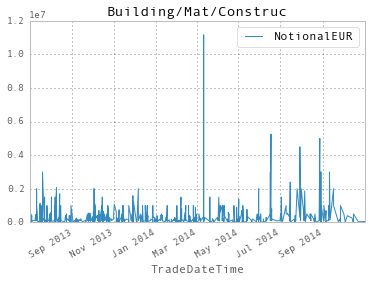

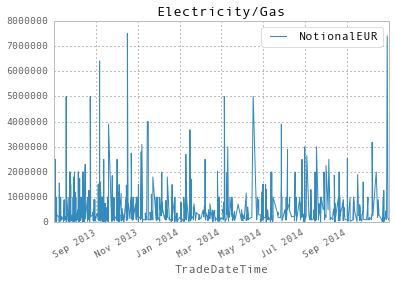

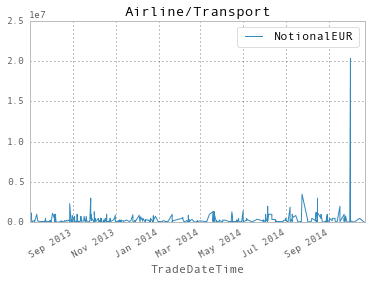

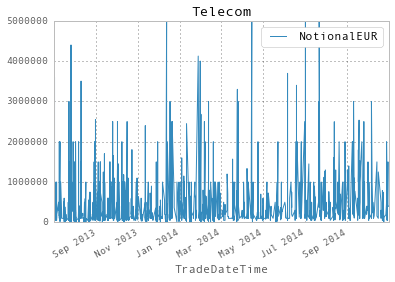

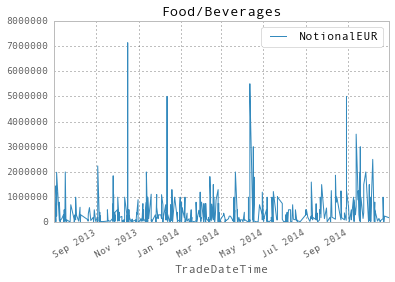

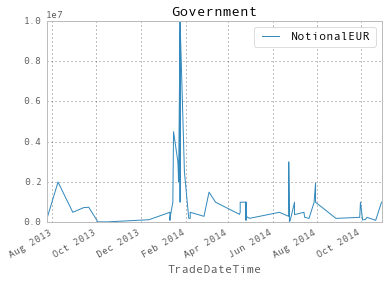

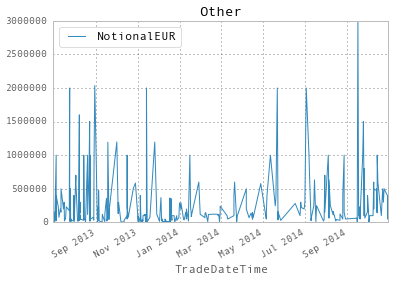

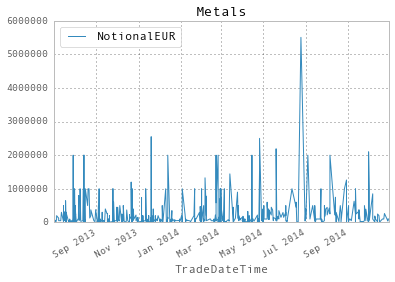

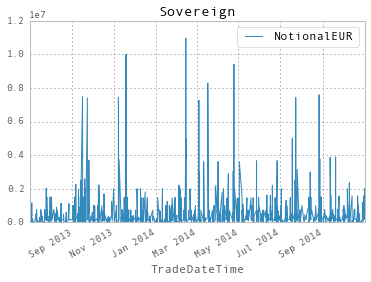

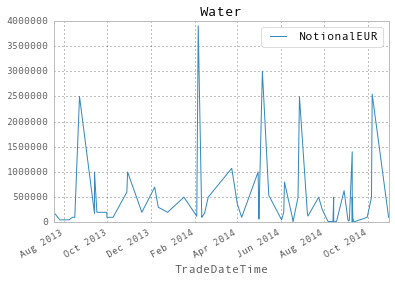

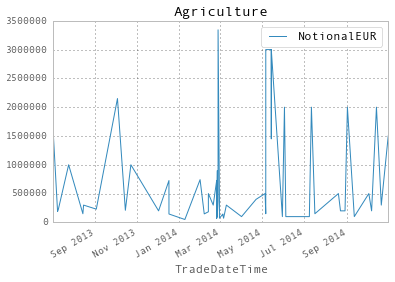

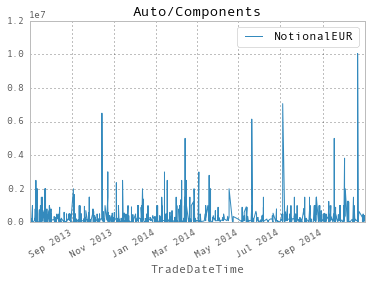

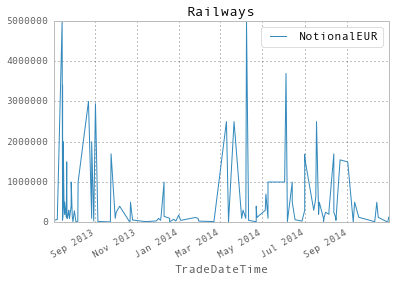

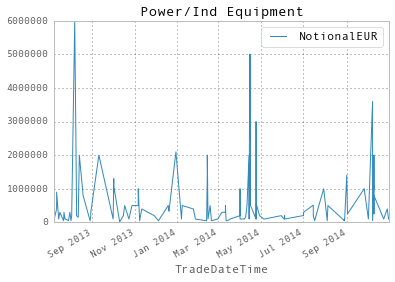

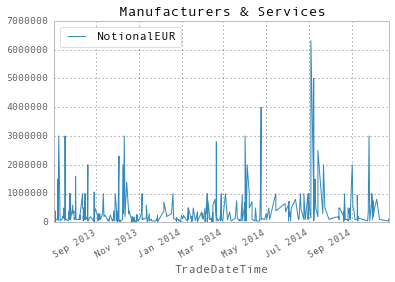

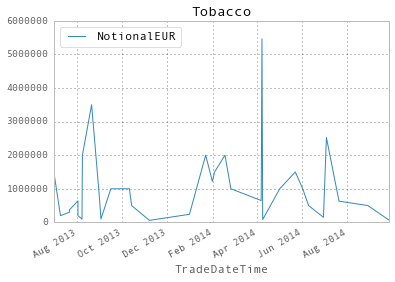

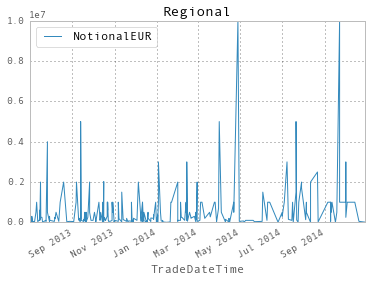

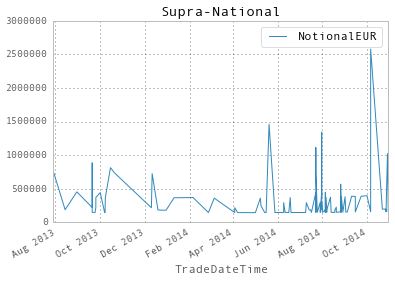

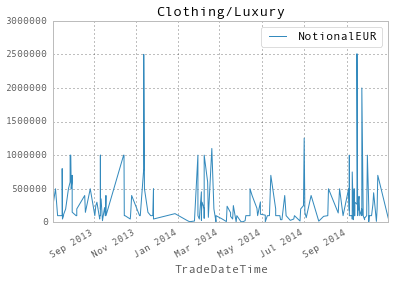

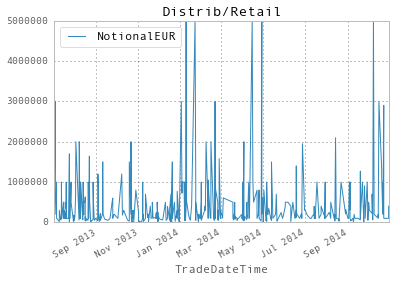

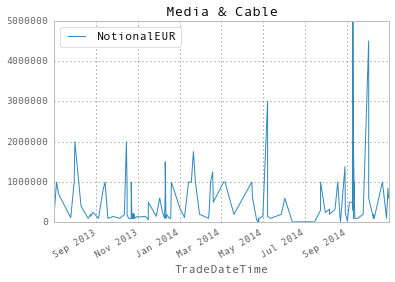

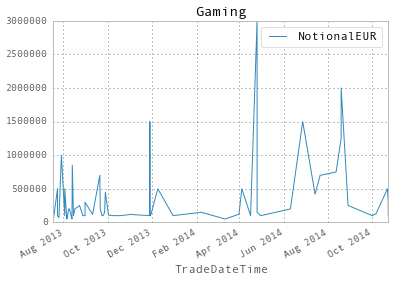

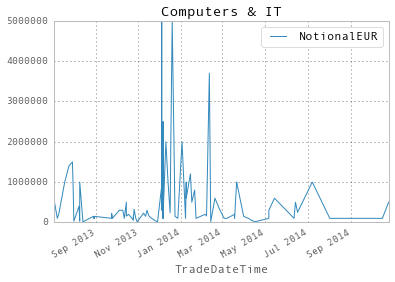

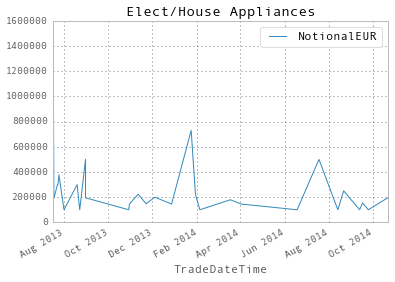

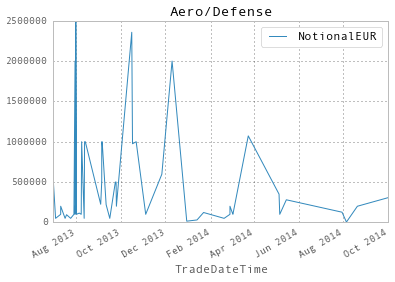

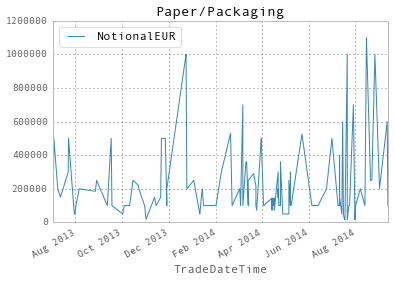

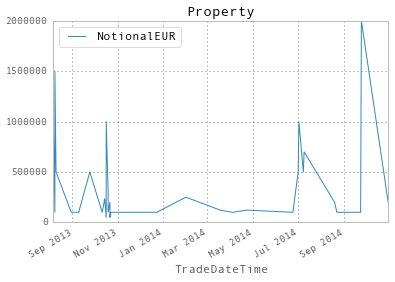

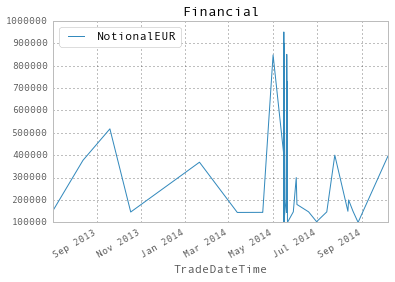

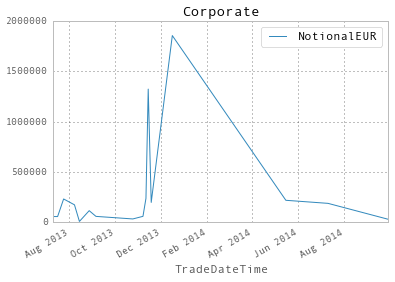

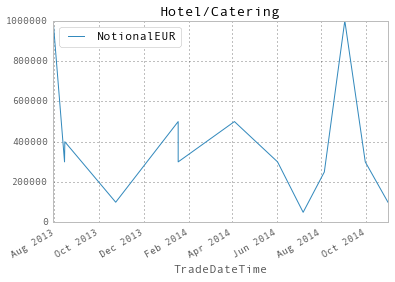

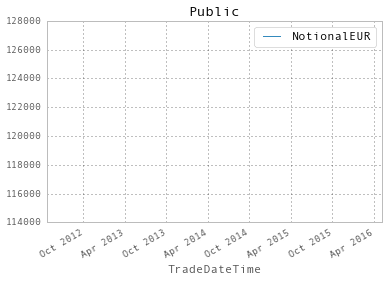

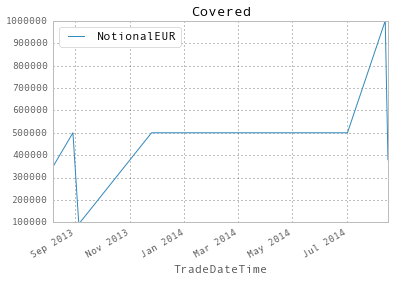

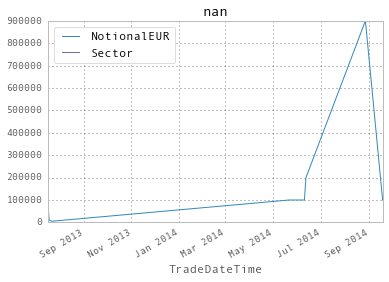

In [23]:
for ele in df2['Sector'].unique():
    ind = df2['Sector'].isin([ele])
    df2[ind][['NotionalEUR', 'Sector']].plot(title = ele)

In [26]:
ind = df2['Sector'] == 'Special Purpose'
df2.ix[ind,'Ticker'].unique()

array(['LLOYDS', 'ROSNRM', 'GAZPRU', 'VEBBNK', 'SBERRU', 'RSHB', 'TEVA',
       'FNCIM', 'CHMFRU', 'CONGR', 'VTB', 'ACSSM', 'EBIUH', 'DAMACR',
       'QTELQD', 'MAFUAE', 'RURAIL', 'SABIC', 'SIBNEF', 'ADCBUH', 'ADIBUH',
       'VIP', 'AALLN', 'DARALA', 'DT', 'VW', 'DB', 'PPCGA', 'DIBUH',
       'KWIPKK', 'TURKSK', 'MOBTEL', 'DEWAAE', 'SLHNVX', 'PETBRA',
       'GLENLN', 'GPBRU', 'UNIVEG', 'CS', 'ZURNVX', 'UBIIM', 'DUGB',
       'MONTE', 'HSHN', 'SOAFSK', 'ALFARU', 'MUNHYP', 'EMIRAT', 'TELEFO',
       'QNBK', 'NOVBNC', 'ONOSM', 'HTHROW', 'METINR', 'SANTAN', 'SECO',
       'INTPET', 'EMAAR', 'POPSM', 'GMKNRM', 'DPB', 'ALRSRU', 'SKGID',
       'NDB', 'FRIGOG', 'GSK', 'BKIR', 'BHRAIN', 'CMZB', 'SWSFIN', 'BPLN',
       'MNDILN', 'SRENVX', 'BATELC', 'RAKS', 'EXIMUK', 'UNITY', 'THAMES',
       'ANVAU', 'SLB', 'SBMINL', 'ENGSM', 'BGBKKK', 'KFINKK', 'TUFIKA',
       'EUCHEM', 'AFKSRU', 'ALHILA', 'WINDIM', 'EWOSAS', 'AVAN', 'URKARM',
       'ISSDC', 'DPWGR', 'JUNEAU', 'CCHLN', 'PKOBP', 'UPCB', 'D

In [27]:
dff = pd.read_csv('/Users/lecueguillaume/Documents/bnpp/bnpp_donnees/ETSAnonymousPricesFull.csv', parse_dates=['TradeDateTime'])

In [28]:
nb_sectors = 5
ind_buy = dff['BuySell'] == 'Sell'
list_sector = list(dff[ind_buy]['Sector'].value_counts()[0:nb_sectors].keys()) # ['Bank', 'Special Purpose', 'Insurance', 'Telecom', 'Sovereign']
ind_sector = dff['Sector'].isin(list_sector)
dff2 = dff[ind_buy & ind_sector][['TradeDateTime', 'NotionalEUR', 'Sector']]

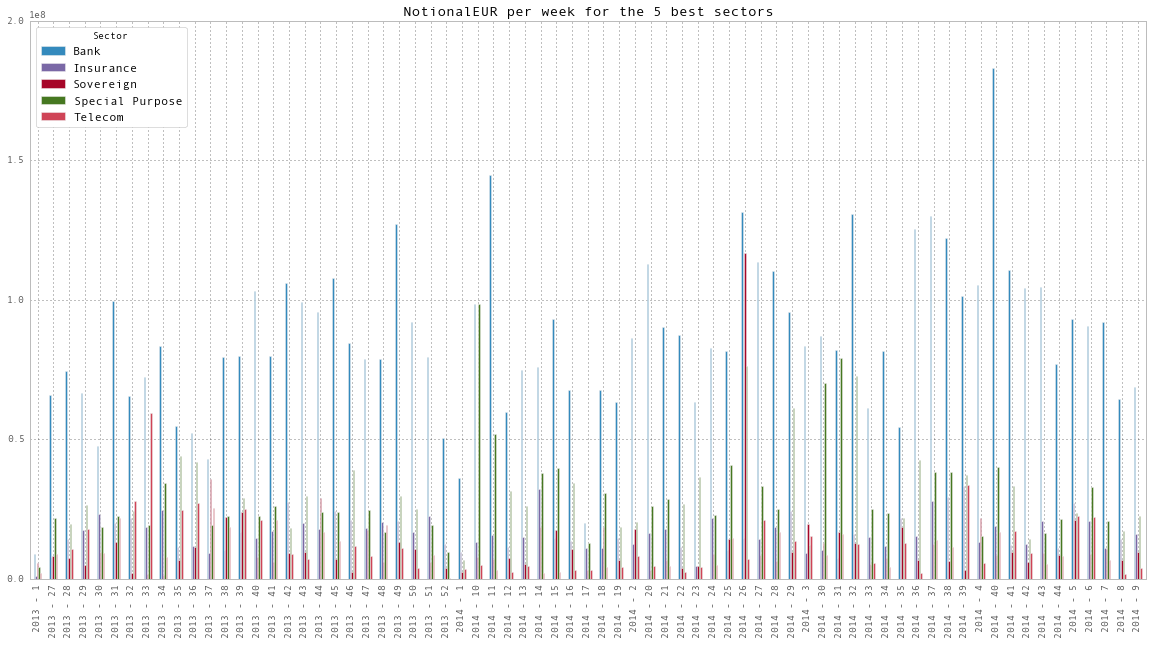

In [29]:
kw = lambda x: x.isocalendar()[1]; 
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
dff2['new_date'] = dff2['TradeDateTime'].map(kw_year)
grouped = dff2.groupby(['new_date', 'Sector'], sort=False, as_index=False).agg({'NotionalEUR': 'sum'})
#grouped.keys()
A = grouped.pivot(index='new_date', columns='Sector', values='NotionalEUR').fillna(0).reset_index()


ticks = A.new_date.values.tolist()
del A['new_date']
ax = A.plot(kind='bar', figsize=(20,10))
ax.set_xticklabels(ticks)
ax.set_title('NotionalEUR per week for the {} best sectors'.format(nb_sectors))
#There is an extra blue sky color???

/Users/lecueguillaume/anaconda/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:82: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


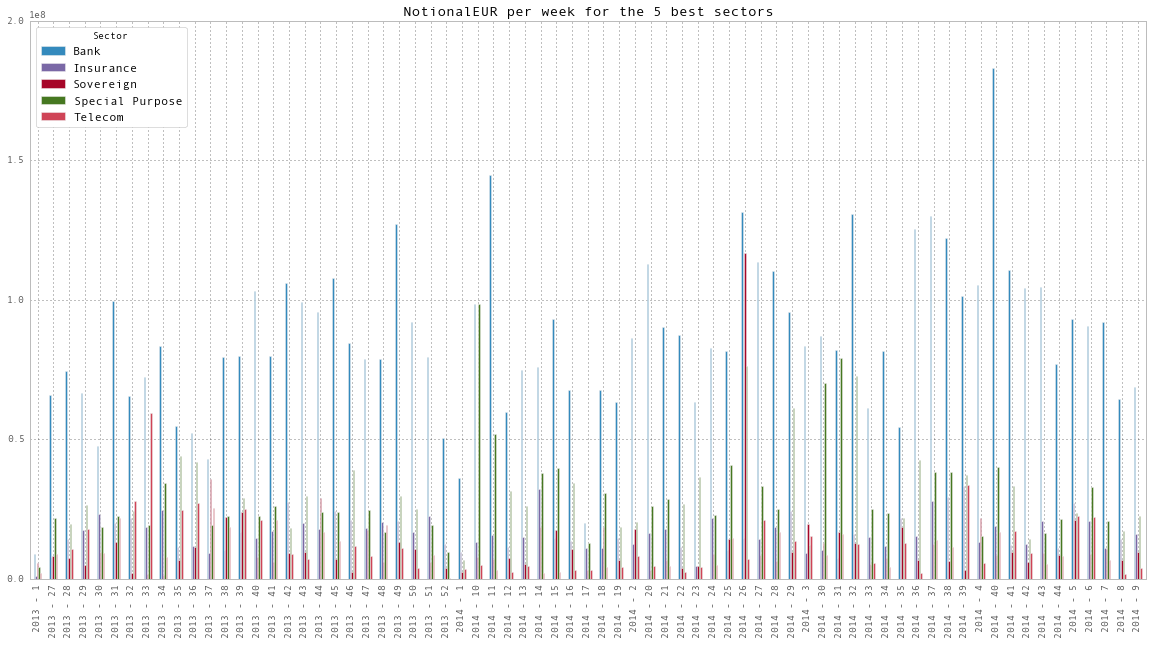

In [52]:
kw = lambda x: x.isocalendar()[1]; 
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
dff2['new_date'] = dff2['TradeDateTime'].map(kw_year)
grouped = dff2.groupby(['new_date', 'Sector'], sort=False, as_index=False).agg({'NotionalEUR': 'sum'})
#grouped.keys()
A = grouped.pivot(index='new_date', columns='Sector', values='NotionalEUR').fillna(0).reset_index()

from mpld3 import enable_notebook # this is a very nice widget for matplotlib
from mpld3 import plugins
enable_notebook()

ticks = A.new_date.values.tolist()
del A['new_date']
ax = A.plot(kind='bar', figsize=(20,10))
ax.set_xticklabels(ticks)
ax.set_title('NotionalEUR per week for the {} best sectors'.format(nb_sectors))